In [18]:
from keras.datasets import mnist
from sklearn.linear_model import SGDClassifier
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

y_train7 = (y_train == 7)
y_test7 = (y_test == 7)
sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(x_train, y_train5)
print(sgd_clf.predict(x_test))
sgd_clf.predict([x_train[0]])

[False False False ... False False False]


array([False])

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone 

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(x_train, y_train7):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train[train_index]
    y_train_folds = y_train7[train_index]
    x_test_fold = x_train[test_index]
    y_test_fold = y_train7[test_index]
    
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.9747512624368782


0.98035


0.9369968498424921


In [62]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train7, cv=3, scoring="accuracy")

array([0.97475126, 0.98035   , 0.93699685])

In [64]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, Y=None):
        pass 
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)

In [65]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, Y_train5, cv=3, scoring="accuracy")

NameError: name 'X_train' is not defined

In [66]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train7, cv=3)

In [67]:
y_train_pred

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train7, y_train_pred)

array([[52221,  1514],
       [  644,  5621]], dtype=int64)

In [29]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train7, y_train_pred)


0.7878065872459705

In [31]:
recall_score(y_train7, y_train_pred)

0.8972067039106145

In [32]:
from sklearn.metrics import f1_score
f1_score(y_train7, y_train_pred)

0.838955223880597

In [73]:
y_scores = sgd_clf.decision_function([x_train[0]])
thresholds = -150000
y_some_digit_pred = (y_scores > thresholds)
y_some_digit_pred, thresholds, y_scores

(array([ True]), -150000, array([-149475.42385269]))

In [80]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train7, cv=3,
                             method="decision_function")
y_scores.shape

(60000,)

In [82]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train7, y_scores)
precisions.shape, recalls.shape, thresholds.shape

((57692,), (57692,), (57691,))

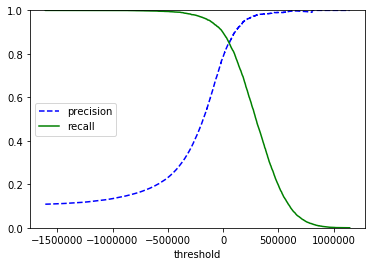

In [83]:
from matplotlib import pyplot as plt 
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:57691], "b--", label='precision')
    plt.plot(thresholds, recalls[:57691], "g-", label='recall')
    plt.xlabel("threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [90]:
y_train_pred_90 = (y_scores > 70000)
precision_score(y_train7, y_train_pred_90)
recall_score(y_train7, y_train_pred_90)

0.8324022346368715

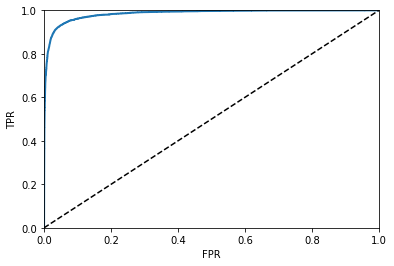

In [92]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train7, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [95]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train7, y_scores)

0.9842730386497363

In [99]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probs_forest = cross_val_predict(forest_clf, x_train, y_train7, cv=3, 
                                   method="predict_proba")
y_probs_forest[:, 1]

array([0., 0., 0., ..., 0., 0., 0.])

In [100]:
y_scores_forest = y_probs_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train7, y_scores_forest)


In [105]:

plt.plot(fpr, tpr, "b:",label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, label='RandomForest')
plt.legend(loc="lower right")
plt.show()

0.9922149762316045

In [104]:
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([x_test[0]])

array([7], dtype=uint8)

In [106]:
some_digit_scores = sgd_clf.decision_function([x_test[0]])
some_digit_scores

array([[ -443628.54049358, -1032831.48143599,  -383319.96444514,
         -130155.95644381,  -478829.91572157,  -286786.09045763,
         -746799.97605978,   275059.67444649,  -365955.85575451,
         -315958.69904369]])

In [109]:
np.argmax(some_digit_scores)

7

In [68]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [69]:
sgd_clf.classes_[7]

7

In [78]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, Y_train)
ovo_clf.predict([X_test[0]])

array([7], dtype=uint8)

In [74]:
len(ovo_clf.estimators_)

45

In [79]:
cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring="accuracy")

array([0.83753249, 0.87549377, 0.880032  ])

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91066787, 0.90619531, 0.91148672])

In [114]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5745,    3,   19,    9,   12,   44,   36,   10,   41,    4],
       [   2, 6461,   47,   24,    5,   41,    5,   10,  132,   15],
       [  52,   37, 5311,   98,   87,   23,   91,   65,  177,   17],
       [  51,   42,  132, 5327,    1,  250,   34,   60,  140,   94],
       [  20,   30,   34,   11, 5355,    7,   52,   30,   83,  220],
       [  69,   41,   32,  177,   78, 4621,  107,   24,  186,   86],
       [  37,   25,   42,    3,   37,   86, 5633,    8,   46,    1],
       [  26,   19,   65,   27,   53,   15,    5, 5801,   15,  239],
       [  55,  151,   64,  148,   15,  164,   52,   26, 5032,  144],
       [  43,   29,   24,   83,  153,   38,    2,  215,   81, 5281]],
      dtype=int64)

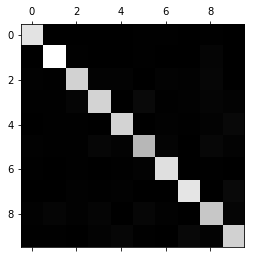

In [116]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

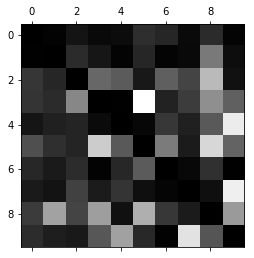

In [118]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [121]:
y_train_pred = cross_val_predict(knn_clf, x_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_pred, average="marco")

KeyboardInterrupt: 